In [1]:
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import helper
import torch.nn.functional as F

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [83]:
model = Classifier()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
train_losses = []
validation_losses = []

for e in range(epochs):
    running_loss = 0
    validation_loss = 0
    accuracy = 0
    
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        #Forward pass
        log_ps = model.forward(images)
        #Compute loss
        loss = criterion(log_ps, labels)
        running_loss += loss
        #Compute gradient
        loss.backward()
        #Update weights using gradient
        optimizer.step()
    
    
    
    with torch.no_grad():
        for images, labels in testloader:
            log_ps = model.forward(images)
            validation_loss += criterion(log_ps, labels)
    
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            
    train_losses.append(running_loss/len(trainloader))
    validation_losses.append(validation_loss/len(testloader))
    print('---EPOCH {}/{}---'.format(e+1, epochs))
    print('Train loss = ',running_loss/len(trainloader))
    print('Validation loss = ',validation_loss/len(testloader))
    print('Accuracy = ', accuracy/len(testloader))
            
        

---EPOCH 1/5---
Train loss =  tensor(1.5350, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.6186)
Accuracy =  tensor(0.8178)
---EPOCH 2/5---
Train loss =  tensor(0.4633, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.3798)
Accuracy =  tensor(0.8867)
---EPOCH 3/5---
Train loss =  tensor(0.3462, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.3205)
Accuracy =  tensor(0.9033)
---EPOCH 4/5---
Train loss =  tensor(0.2982, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.2861)
Accuracy =  tensor(0.9142)
---EPOCH 5/5---
Train loss =  tensor(0.2629, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.2482)
Accuracy =  tensor(0.9284)


In [61]:
#Test the predictions of some images
images, labels = next(iter(trainloader))
ps = model.forward(images)
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10,:])

tensor([[6],
        [0],
        [4],
        [9],
        [3],
        [4],
        [1],
        [8],
        [3],
        [7]])


7


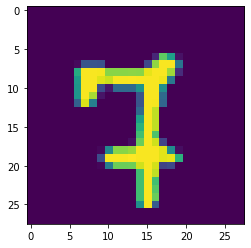

In [71]:
i=9
plt.imshow(images[i].numpy().squeeze())
print(np.argmax(ps[i].detach().numpy()))

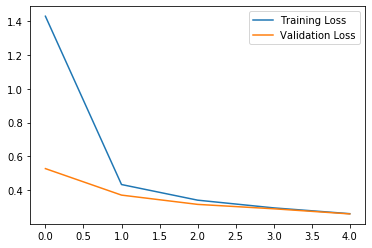

In [78]:
#Plot losses on a graph
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.legend()